In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
# Constant Variables
# Directories
DATA_DIRECTORY = 'data/'
GRAPHS_DIRECTORY = 'graphs/'

# Filenames
CLEANED_DATA_FILENAME = 'cleaned_data.json'
BUS_LATE_LOCATIONS = 'bus_late_locations.png'

# Load the Data

In [3]:
# Read cleaned_real_time_data.json
df = pd.read_json(DATA_DIRECTORY + CLEANED_DATA_FILENAME)

# Convert the time strings to datetime.time objects
df['RecordedTime'] = pd.to_datetime(df['RecordedTime'], format='%H:%M:%S').dt.time

# Convert the date strings to datetime.date objects
df['RecordedDate'] = pd.to_datetime(df['RecordedDate'], unit='ms')

# Get the recorded hour
df['RecordedHour'] = df['RecordedTime'].apply(lambda x: x.hour)

# Set the RouteNo as string type
df['RouteNo'] = df['RouteNo'].astype(str)

In [4]:
df

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
0,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07,True,7
1,144,NORTH,49.225700,-122.994100,07:03:23,2024-04-07,True,7
2,144,NORTH,49.229850,-122.992800,07:04:45,2024-04-07,True,7
3,144,NORTH,49.229650,-122.987017,07:05:43,2024-04-07,True,7
4,144,NORTH,49.229450,-122.975800,07:06:43,2024-04-07,True,7
...,...,...,...,...,...,...,...,...
68452,R5,WEST,49.280133,-122.920233,22:59:21,2024-04-10,True,22
68453,R5,EAST,49.280367,-122.956417,22:59:26,2024-04-10,True,22
68454,R5,WEST,49.281200,-123.025333,22:59:30,2024-04-10,True,22
68455,R5,EAST,49.281083,-123.056533,22:59:15,2024-04-10,True,22


# Analyze the Data

In [5]:
df[df['RouteNo'] == '144']

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
0,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07,True,7
1,144,NORTH,49.225700,-122.994100,07:03:23,2024-04-07,True,7
2,144,NORTH,49.229850,-122.992800,07:04:45,2024-04-07,True,7
3,144,NORTH,49.229650,-122.987017,07:05:43,2024-04-07,True,7
4,144,NORTH,49.229450,-122.975800,07:06:43,2024-04-07,True,7
...,...,...,...,...,...,...,...,...
19022,144,NORTH,49.253917,-122.966467,22:58:06,2024-04-10,True,22
19023,144,SOUTH,49.279833,-122.920367,22:58:15,2024-04-10,True,22
19024,144,SOUTH,49.232383,-122.960217,22:59:44,2024-04-10,True,22
19025,144,NORTH,49.260083,-122.967150,22:59:07,2024-04-10,True,22


In [6]:
df[df['RouteNo'] == '145']

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
19027,145,SOUTH,49.278533,-122.912917,07:55:51,2024-04-07,True,7
19028,145,SOUTH,49.278350,-122.912633,07:57:11,2024-04-07,True,7
19029,145,SOUTH,49.280217,-122.920350,08:00:56,2024-04-07,True,8
19030,145,SOUTH,49.275100,-122.928700,08:02:47,2024-04-07,True,8
19031,145,SOUTH,49.275100,-122.928700,08:02:49,2024-04-07,True,8
...,...,...,...,...,...,...,...,...
30642,145,NORTH,49.280600,-122.911350,22:57:29,2024-04-10,True,22
30643,145,SOUTH,49.253217,-122.917583,22:58:23,2024-04-10,True,22
30644,145,SOUTH,49.279067,-122.912300,22:58:27,2024-04-10,True,22
30645,145,SOUTH,49.253217,-122.917583,22:59:22,2024-04-10,True,22


In [7]:
df[df['RouteNo'] == 'R5']

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
30647,R5,WEST,49.280167,-122.920417,07:00:04,2024-04-07,True,7
30648,R5,EAST,49.281100,-123.031817,07:00:40,2024-04-07,True,7
30649,R5,WEST,49.282050,-123.107200,07:00:15,2024-04-07,True,7
30650,R5,WEST,49.281333,-123.070167,07:00:10,2024-04-07,True,7
30651,R5,WEST,49.280867,-122.929300,07:01:04,2024-04-07,True,7
...,...,...,...,...,...,...,...,...
68452,R5,WEST,49.280133,-122.920233,22:59:21,2024-04-10,True,22
68453,R5,EAST,49.280367,-122.956417,22:59:26,2024-04-10,True,22
68454,R5,WEST,49.281200,-123.025333,22:59:30,2024-04-10,True,22
68455,R5,EAST,49.281083,-123.056533,22:59:15,2024-04-10,True,22


In [8]:
df[df['OnTime'] == True]

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
0,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07,True,7
1,144,NORTH,49.225700,-122.994100,07:03:23,2024-04-07,True,7
2,144,NORTH,49.229850,-122.992800,07:04:45,2024-04-07,True,7
3,144,NORTH,49.229650,-122.987017,07:05:43,2024-04-07,True,7
4,144,NORTH,49.229450,-122.975800,07:06:43,2024-04-07,True,7
...,...,...,...,...,...,...,...,...
68452,R5,WEST,49.280133,-122.920233,22:59:21,2024-04-10,True,22
68453,R5,EAST,49.280367,-122.956417,22:59:26,2024-04-10,True,22
68454,R5,WEST,49.281200,-123.025333,22:59:30,2024-04-10,True,22
68455,R5,EAST,49.281083,-123.056533,22:59:15,2024-04-10,True,22


In [9]:
df[df['OnTime'] == False]

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
971,144,NORTH,49.226433,-123.003900,13:42:16,2024-04-07,False,13
1055,144,NORTH,49.225267,-123.002267,14:10:44,2024-04-07,False,14
1152,144,NORTH,49.225417,-123.002733,14:40:11,2024-04-07,False,14
1157,144,NORTH,49.225417,-123.002983,14:41:11,2024-04-07,False,14
1162,144,NORTH,49.225250,-123.002750,14:42:10,2024-04-07,False,14
...,...,...,...,...,...,...,...,...
66515,R5,EAST,49.280267,-122.989550,18:27:23,2024-04-10,False,18
66544,R5,EAST,49.280283,-122.979550,18:29:33,2024-04-10,False,18
67004,R5,EAST,49.285367,-123.114033,19:09:25,2024-04-10,False,19
67208,R5,EAST,49.285233,-123.113800,19:43:37,2024-04-10,False,19


In [10]:
df[(df['OnTime'] == True) & (df['RouteNo'] == '144')]

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
0,144,NORTH,49.225150,-123.002100,07:00:07,2024-04-07,True,7
1,144,NORTH,49.225700,-122.994100,07:03:23,2024-04-07,True,7
2,144,NORTH,49.229850,-122.992800,07:04:45,2024-04-07,True,7
3,144,NORTH,49.229650,-122.987017,07:05:43,2024-04-07,True,7
4,144,NORTH,49.229450,-122.975800,07:06:43,2024-04-07,True,7
...,...,...,...,...,...,...,...,...
19022,144,NORTH,49.253917,-122.966467,22:58:06,2024-04-10,True,22
19023,144,SOUTH,49.279833,-122.920367,22:58:15,2024-04-10,True,22
19024,144,SOUTH,49.232383,-122.960217,22:59:44,2024-04-10,True,22
19025,144,NORTH,49.260083,-122.967150,22:59:07,2024-04-10,True,22


In [11]:
df[(df['OnTime'] == True) & (df['RouteNo'] == '145')]

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
19027,145,SOUTH,49.278533,-122.912917,07:55:51,2024-04-07,True,7
19028,145,SOUTH,49.278350,-122.912633,07:57:11,2024-04-07,True,7
19029,145,SOUTH,49.280217,-122.920350,08:00:56,2024-04-07,True,8
19030,145,SOUTH,49.275100,-122.928700,08:02:47,2024-04-07,True,8
19031,145,SOUTH,49.275100,-122.928700,08:02:49,2024-04-07,True,8
...,...,...,...,...,...,...,...,...
30642,145,NORTH,49.280600,-122.911350,22:57:29,2024-04-10,True,22
30643,145,SOUTH,49.253217,-122.917583,22:58:23,2024-04-10,True,22
30644,145,SOUTH,49.279067,-122.912300,22:58:27,2024-04-10,True,22
30645,145,SOUTH,49.253217,-122.917583,22:59:22,2024-04-10,True,22


In [12]:
df[(df['OnTime'] == True) & (df['RouteNo'] == 'R5')]

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
30647,R5,WEST,49.280167,-122.920417,07:00:04,2024-04-07,True,7
30648,R5,EAST,49.281100,-123.031817,07:00:40,2024-04-07,True,7
30649,R5,WEST,49.282050,-123.107200,07:00:15,2024-04-07,True,7
30650,R5,WEST,49.281333,-123.070167,07:00:10,2024-04-07,True,7
30651,R5,WEST,49.280867,-122.929300,07:01:04,2024-04-07,True,7
...,...,...,...,...,...,...,...,...
68452,R5,WEST,49.280133,-122.920233,22:59:21,2024-04-10,True,22
68453,R5,EAST,49.280367,-122.956417,22:59:26,2024-04-10,True,22
68454,R5,WEST,49.281200,-123.025333,22:59:30,2024-04-10,True,22
68455,R5,EAST,49.281083,-123.056533,22:59:15,2024-04-10,True,22


In [13]:
df[(df['OnTime'] == False) & (df['RouteNo'] == '144')]

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
971,144,NORTH,49.226433,-123.003900,13:42:16,2024-04-07,False,13
1055,144,NORTH,49.225267,-123.002267,14:10:44,2024-04-07,False,14
1152,144,NORTH,49.225417,-123.002733,14:40:11,2024-04-07,False,14
1157,144,NORTH,49.225417,-123.002983,14:41:11,2024-04-07,False,14
1162,144,NORTH,49.225250,-123.002750,14:42:10,2024-04-07,False,14
...,...,...,...,...,...,...,...,...
17657,144,SOUTH,49.236383,-122.955650,17:08:24,2024-04-10,False,17
17680,144,SOUTH,49.236383,-122.955650,17:12:23,2024-04-10,False,17
18509,144,NORTH,49.225183,-123.002233,20:14:32,2024-04-10,False,20
18513,144,NORTH,49.225200,-123.002233,20:15:31,2024-04-10,False,20


In [14]:
df[(df['OnTime'] == False) & (df['RouteNo'] == '145')]

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
20328,145,SOUTH,49.253217,-122.917533,21:30:19,2024-04-07,False,21
20330,145,SOUTH,49.253217,-122.917533,21:31:20,2024-04-07,False,21
20332,145,SOUTH,49.253233,-122.917850,21:32:35,2024-04-07,False,21
20373,145,SOUTH,49.253250,-122.917567,21:59:35,2024-04-07,False,21
20375,145,SOUTH,49.253250,-122.917567,22:00:34,2024-04-07,False,22
...,...,...,...,...,...,...,...,...
30209,145,SOUTH,49.278850,-122.912767,18:57:49,2024-04-10,False,18
30238,145,SOUTH,49.278850,-122.912800,19:10:13,2024-04-10,False,19
30241,145,SOUTH,49.278850,-122.912800,19:11:53,2024-04-10,False,19
30245,145,SOUTH,49.278850,-122.912800,19:12:51,2024-04-10,False,19


In [15]:
df[(df['OnTime'] == False) & (df['RouteNo'] == 'R5')]

,RouteNo,Direction,Latitude,Longitude,RecordedTime,RecordedDate,OnTime,RecordedHour
31053,R5,WEST,49.279017,-122.912317,08:10:42,2024-04-07,False,8
31215,R5,WEST,49.279083,-122.912250,08:39:58,2024-04-07,False,8
32486,R5,WEST,49.278833,-122.912667,12:04:04,2024-04-07,False,12
32492,R5,WEST,49.278550,-122.912400,12:05:04,2024-04-07,False,12
32498,R5,WEST,49.278600,-122.912383,12:06:04,2024-04-07,False,12
...,...,...,...,...,...,...,...,...
66515,R5,EAST,49.280267,-122.989550,18:27:23,2024-04-10,False,18
66544,R5,EAST,49.280283,-122.979550,18:29:33,2024-04-10,False,18
67004,R5,EAST,49.285367,-123.114033,19:09:25,2024-04-10,False,19
67208,R5,EAST,49.285233,-123.113800,19:43:37,2024-04-10,False,19


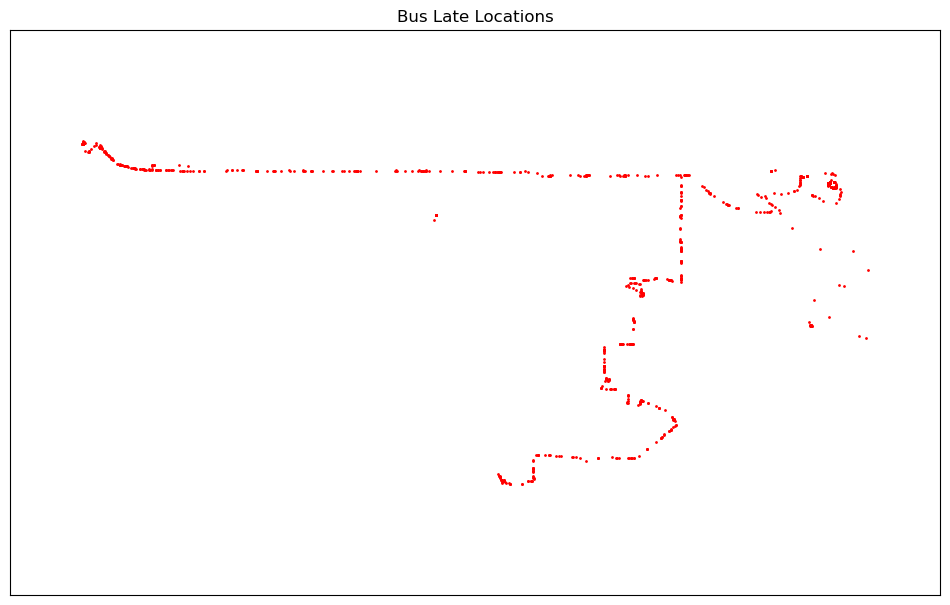

In [16]:
# Create a map that shows the real time data which is late
df_late = df[(df['OnTime'] == False)]
lats = df_late['Latitude']
lons = df_late['Longitude']

# Create a map
plt.figure(figsize=(12,8))
m = Basemap(projection='merc', 
            llcrnrlat=min(lats)-0.02, urcrnrlat=max(lats)+0.02,
            llcrnrlon=min(lons)-0.02, urcrnrlon=max(lons)+0.02, 
            resolution='i')

# Convert the Latitudes and Longitudes to the map positions
x, y = m(lons, lats)

# Plot the graph
m.scatter(x, y, marker='o', color='r', zorder=5, s=1)
plt.title('Bus Late Locations')
plt.savefig(GRAPHS_DIRECTORY + BUS_LATE_LOCATIONS)

In [17]:
df_late.groupby('RecordedHour').size()

RecordedHour
7      42
8      93
9     209
10    105
11    128
12     59
13     40
14     38
15     67
16     69
17     75
18     56
19     12
20      3
21     11
22      9
dtype: int64